In [ ]:
%pip install pandas_montecarlo --upgrade --no-cache-dir


In [2]:
import pandas as pd
import numpy as np
import pandas_montecarlo

# Shiller monthly data

In [3]:
# From shiller 
df = pd.read_excel("ie_data.xls", "Data")


In [4]:
df[7:].head(20)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
7,1871.01,4.44,0.26,0.4,12.464061,1871.041667,5.32,97.250271,5.694836,97.250271,...,NaN,NaN,NaN,NaN,NaN,1.004177,1,0.130609,0.092504,0.038106
8,1871.02,4.5,0.26,0.4,12.844641,1871.125,5.323333,95.644049,5.526101,96.104557,...,NaN,NaN,NaN,NaN,NaN,1.00418,0.974424,0.130858,0.094635,0.036224
9,1871.03,4.61,0.26,0.4,13.034972,1871.208333,5.326667,96.551327,5.445411,97.472173,...,NaN,NaN,NaN,NaN,NaN,1.004183,0.964209,0.130951,0.096186,0.034765
10,1871.04,4.74,0.26,0.4,12.559226,1871.291667,5.33,103.034548,5.651684,104.492692,...,NaN,NaN,NaN,NaN,NaN,1.004185,1.004919,0.122056,0.090972,0.031084
11,1871.05,4.86,0.26,0.4,12.273812,1871.375,5.333333,108.099637,5.783108,110.118209,...,NaN,NaN,NaN,NaN,NaN,1.004188,1.032591,0.122638,0.089488,0.03315
12,1871.06,4.82,0.26,0.4,12.083481,1871.458333,5.336667,108.898625,5.8742,111.430773,...,NaN,NaN,NaN,NaN,NaN,1.004191,1.053249,0.123093,0.087725,0.035368
13,1871.07,4.73,0.26,0.4,12.083481,1871.541667,5.34,106.865248,5.8742,109.851015,...,NaN,NaN,NaN,NaN,NaN,1.004194,1.057663,0.120022,0.086581,0.033441
14,1871.08,4.79,0.26,0.4,11.893231,1871.625,5.343333,109.951982,5.968166,113.535234,...,NaN,NaN,NaN,NaN,NaN,1.004197,1.079088,0.111933,0.082669,0.029264
15,1871.09,4.84,0.26,0.4,12.178646,1871.708333,5.346667,108.496009,5.828298,112.533332,...,NaN,NaN,NaN,NaN,NaN,1.004199,1.058222,0.110028,0.081048,0.02898
16,1871.1,4.59,0.26,0.4,12.368896,1871.791667,5.35,101.309267,5.738651,105.575174,...,NaN,NaN,NaN,NaN,NaN,1.004202,1.04632,0.114765,0.081653,0.033113


In [62]:
# get percent change m-o-m
df2 = df[7:1808].copy()
df2["pct"] = pd.to_numeric(df2["Unnamed: 1"]).pct_change()
stdev = df2["pct"].std()
# print stdev as percentage
print("Stdev ", stdev * 100)

Stdev  4.0696146685580254


In [7]:
df2[["Unnamed: 0", "Unnamed: 1", "pct"]].head(20)

,Unnamed: 0,Unnamed: 1,pct
7,1871.01,4.44,NaN
8,1871.02,4.5,0.013514
9,1871.03,4.61,0.024444
10,1871.04,4.74,0.028200
11,1871.05,4.86,0.025316
12,1871.06,4.82,-0.008230
13,1871.07,4.73,-0.018672
14,1871.08,4.79,0.012685
15,1871.09,4.84,0.010438
16,1871.1,4.59,-0.051653


In [78]:
# For each month, if the change is greater than the threshold then add the gain, else subtract the loss.
# Plain vanilla, rest is all invested in mkt, so gets market returns

winThreshold = 2 * stdev  # capture the tail
multiplier = 2
# Cost, it is 2 sided, remember. 0.25% per month is the typical cost at 2 stdev
costOfOptions = multiplier * 0.25 / 100


def gain(row):
    if row["pct"] <= 0:
        # Make sure polarity of cost of options always reduces returns
        mainPfReturns = (1 + costOfOptions) * row["pct"]
        optionReturns = 0
        if row["pct"] < -winThreshold:
            optionReturns = -row["pct"] - winThreshold * multiplier / 2
        return mainPfReturns + optionReturns
    elif row["pct"] > 0:
        # Make sure polarity of cost of options always reduces returns
        mainPfReturns = (1 - costOfOptions) * row["pct"]
        optionReturns = 0
        if row["pct"] > winThreshold:
            optionReturns = row["pct"] - winThreshold * multiplier / 2
        return mainPfReturns + optionReturns


df2["gain_pct"] = df2.apply(lambda row: gain(row), axis=1)
portfolioVal = df2.head(1)["Unnamed: 1"].values[0]
oldPfVal = portfolioVal # Only for sanity checks
pfList = [portfolioVal]
# shift the gain by 1 week for comparison and iterate over all rows of df2
for _, row in df2.shift(-1).iterrows():
    if np.isnan(row["gain_pct"]):
        continue
    portfolioVal += portfolioVal * row["gain_pct"]
    oldPfVal += oldPfVal * row["pct"]
    pfList.append(portfolioVal)
print(
    "Strategy ending val ",
    portfolioVal,
    "Months ",
    len(pfList),
    len(df2),
    "Ending val buy and hold ",
    df2.tail(1)["Unnamed: 1"],
    oldPfVal
)


Strategy ending val  59562.211523152706 Months  1801 1801 Ending val buy and hold  1807    3793.748421
Name: Unnamed: 1, dtype: object 3793.748421052611


# Plotting the wins

<AxesSubplot:>

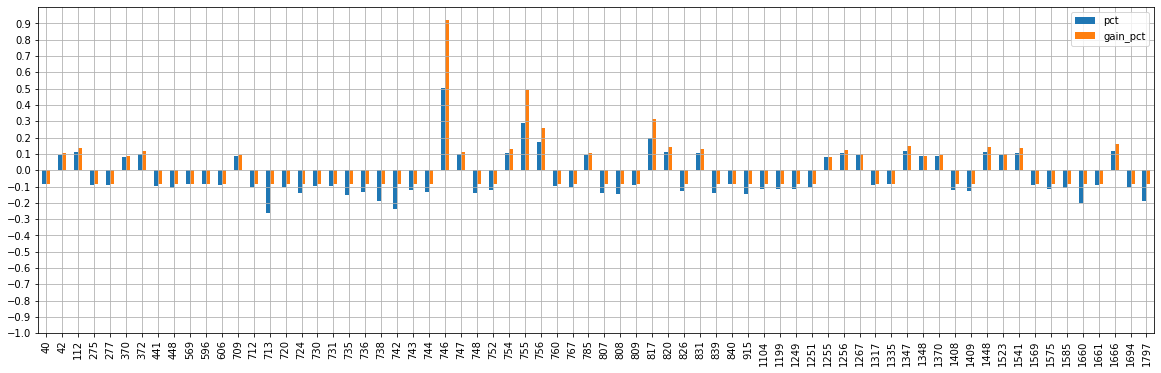

In [71]:
df2[(df2["pct"] > winThreshold) | (df2["pct"] < -winThreshold)][
    ["pct", "gain_pct"]
].plot(
    kind="bar",
    ylim=(-1, 1),
    figsize=(20, 6),
    grid=True,
    yticks=tuple(np.arange(-1, 1, 0.1)),
)


In [66]:
print(
    "2SD wins ",
    len(df2[(df2["pct"] > winThreshold)]),
    "2SD losses ",
    len(df2[(df2["pct"] < -winThreshold)]),
)


2SD wins  24 2SD losses  46


In [16]:
# How we do in the drawdowns
df2[(df2['pct'] < -winThreshold)][["Unnamed: 1", "portfolio", "pct", "gain_pct"]]

,Unnamed: 1,portfolio,pct,gain_pct
40,4.19,4.203276,-0.087146,-0.081828
275,4.84,4.940836,-0.088512,-0.081835
277,4.18,4.319736,-0.093275,-0.081859
441,8.35,8.752283,-0.098272,-0.081884
448,6.64,7.161842,-0.108725,-0.081936
569,7.04,7.498920,-0.083333,-0.081809
596,8.1,8.606254,-0.082673,-0.081806
606,6.81,7.286517,-0.089572,-0.081840
712,27.99,30.523700,-0.105751,-0.081921
713,20.58,27.998903,-0.264737,-0.082716


<AxesSubplot:>

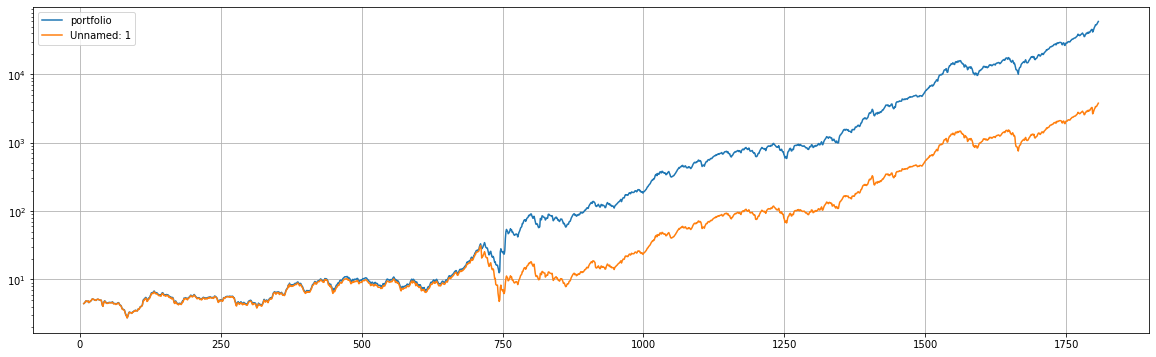

In [79]:
df2["portfolio"] = pfList
df2[['portfolio','Unnamed: 1']].plot(figsize=(20,6), grid=True, logy=True)

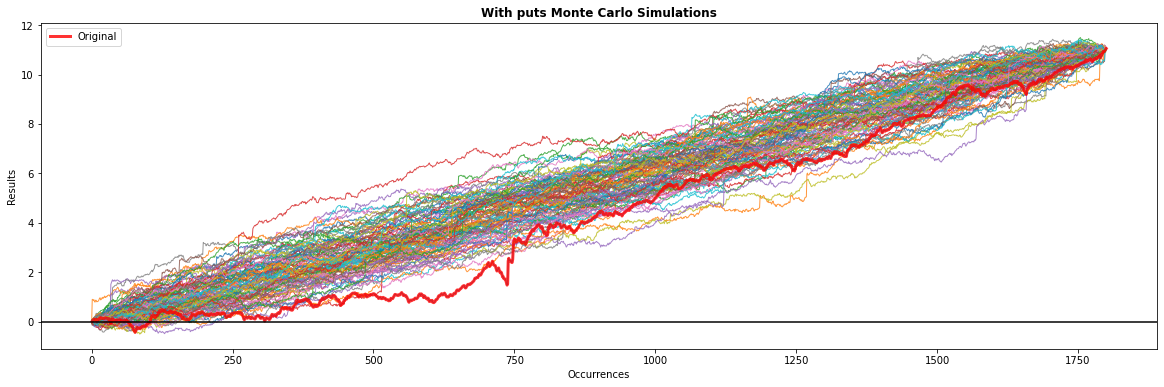

{'min': 11.050692069763643, 'max': 11.0506920697637, 'mean': 11.050692069763672, 'median': 11.05069206976367, 'std': 1.2381839020917769e-14, 'maxdd': -0.5024499943694585, 'bust': 0.15, 'goal': 0.85}


In [81]:

mc = df2['gain_pct'].montecarlo(sims=100, bust=-0.25, goal=1)
mc.plot(title="With puts Monte Carlo Simulations", figsize=(20, 6))
print(mc.stats)

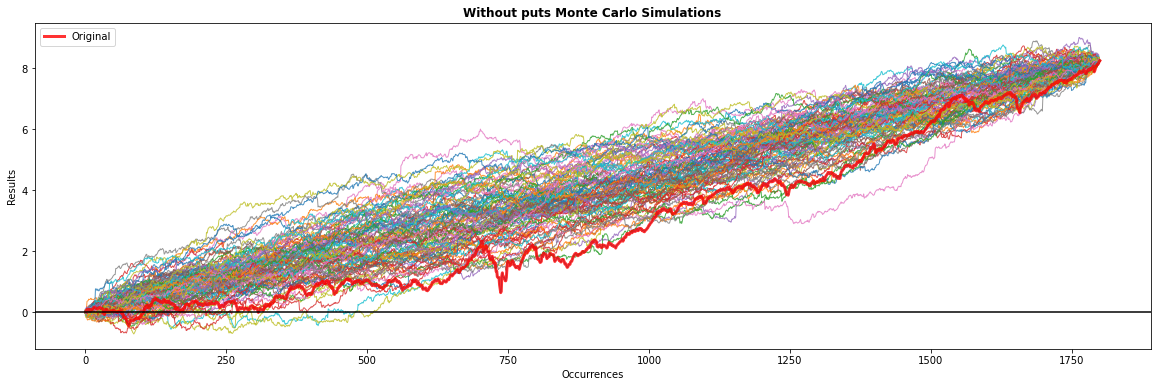

{'min': 8.250132331879206, 'max': 8.250132331879241, 'mean': 8.250132331879225, 'median': 8.250132331879225, 'std': 8.26656349103221e-15, 'maxdd': -0.7175978240072907, 'bust': 0.26, 'goal': 0.74}


In [18]:

mc = df2['pct'].montecarlo(sims=100, bust=-0.2, goal=1)
mc.plot(title="Without puts Monte Carlo Simulations", figsize=(20, 6))
print(mc.stats)

In [194]:
# If you want to dump to csv
# df2["power"] = pfList
# df2.to_csv("/Users/shan/Documents/power3.csv", index=False)

/var/folders/b7/nt75slqx7lgc80c_xh9gxg640000gn/T/ipykernel_93425/1493197684.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# With no mkt investment at all, pure barbell

In [58]:
# For each month, if the change is greater than the threshold then add the gain, else subtract the loss.
# BARBELL

df3 = df2

winThreshold = 2 * stdev  # capture the tail

multiplier = 1 # Must be divisible by 2 if following is False
usePutsOnly = True

interestPerMo = 6.25 / (100 * 12) # NOTE: LOL! OR Get by selling calls?
costOfOptions = (multiplier * 0.25 / 100) - interestPerMo 

def gain(row):
    if usePutsOnly:
        # Here cost of options is always negative as you are not using market returns
        if row["pct"] < -winThreshold:
            # Do not divide the multiplier by 2
            retVal = -costOfOptions + (-row["pct"] - winThreshold) * multiplier
            return retVal
        else:
            retVal = -costOfOptions
            return retVal
    else:
        # Here cost of options is always negative as you are not using market returns
        if row["pct"] > winThreshold:
            retVal = -costOfOptions + (row["pct"] - winThreshold) * multiplier / 2
            return retVal
        elif row["pct"] < -winThreshold:
            retVal = -costOfOptions + (-row["pct"] - winThreshold) * multiplier / 2
            return retVal
        else:
            retVal = -costOfOptions
            return retVal


df3["gain_pct"] = df3.apply(lambda row: gain(row), axis=1)
# shift the gain by 1 week for comparison
portfolioVal = df3.head(1)["Unnamed: 1"].values[0]
pfList = [portfolioVal]
# iterate over all rows of df3
for i, row in df3.shift(-1).iterrows():
    # Check gain_pct is nan
    if np.isnan(row["gain_pct"]):
        continue
    portfolioVal += portfolioVal * row["gain_pct"]
    pfList.append(portfolioVal)
print(portfolioVal, len(pfList), len(df3), df3.tail(1)["Unnamed: 1"])


3462.4578147175644 1801 1801 1807    3793.748421
Name: Unnamed: 1, dtype: object


/var/folders/b7/nt75slqx7lgc80c_xh9gxg640000gn/T/ipykernel_26637/2368190118.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["gain_pct"] = df3.apply(lambda row: gain(row), axis=1)


<AxesSubplot:>

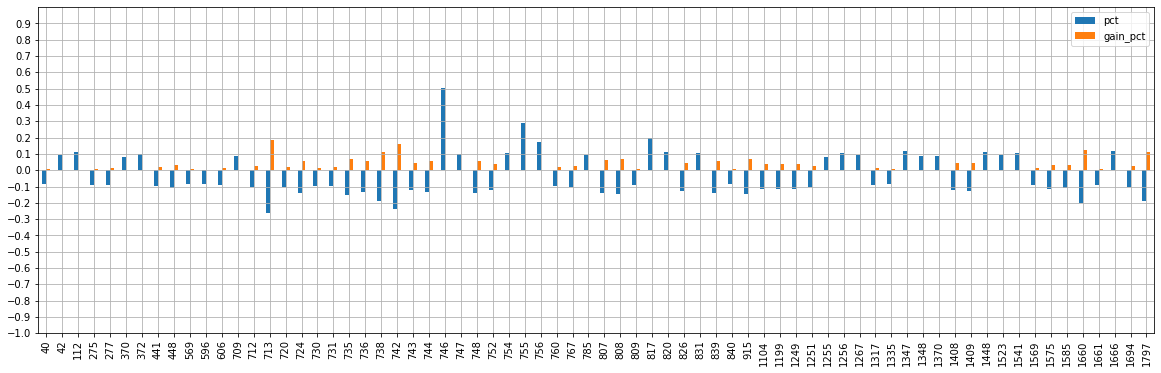

In [59]:
df3[(df3["pct"] > winThreshold) | (df3["pct"] < -winThreshold)][
    ["pct", "gain_pct"]
].plot(
    kind="bar",
    ylim=(-1, 1),
    figsize=(20, 6),
    grid=True,
    yticks=tuple(np.arange(-1, 1, 0.1)),
)


/var/folders/b7/nt75slqx7lgc80c_xh9gxg640000gn/T/ipykernel_26637/2105310843.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["portfolio"] = pfList


<AxesSubplot:>

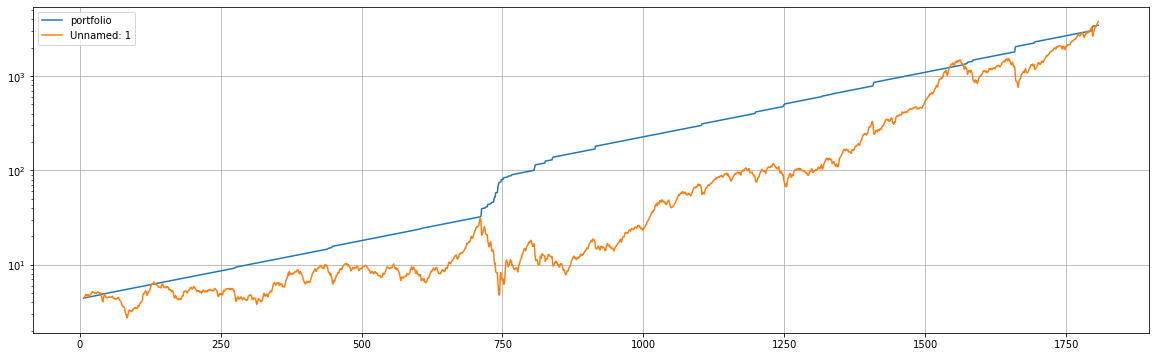

In [60]:
df3["portfolio"] = pfList
df3[['portfolio','Unnamed: 1']].plot(figsize=(20,6), grid=True, logy=True)

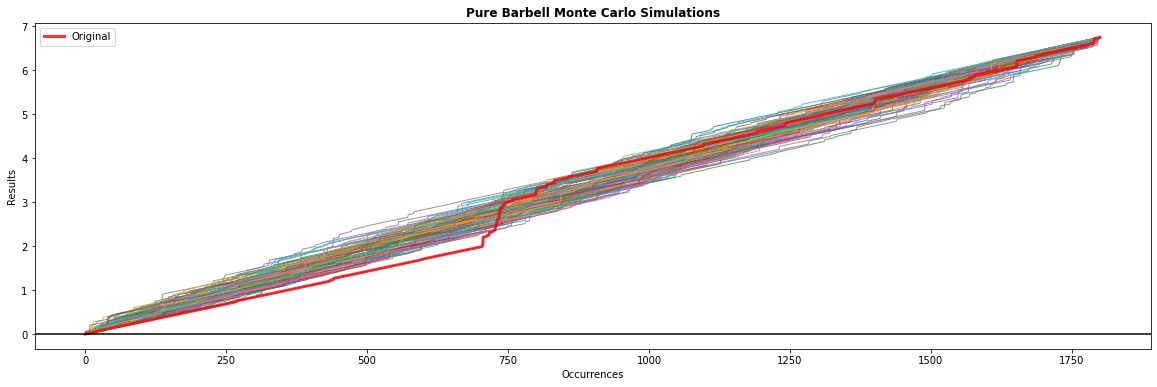

{'min': 6.741666470072734, 'max': 6.7416664700728015, 'mean': 6.741666470072775, 'median': 6.741666470072774, 'std': 1.1659632469897484e-14, 'maxdd': nan, 'bust': 0.0, 'goal': 1.0}


In [61]:

mc = df3['gain_pct'].montecarlo(sims=100, bust=-0.2, goal=1)
mc.plot(title="Pure Barbell Monte Carlo Simulations", figsize=(20, 6))
print(mc.stats)

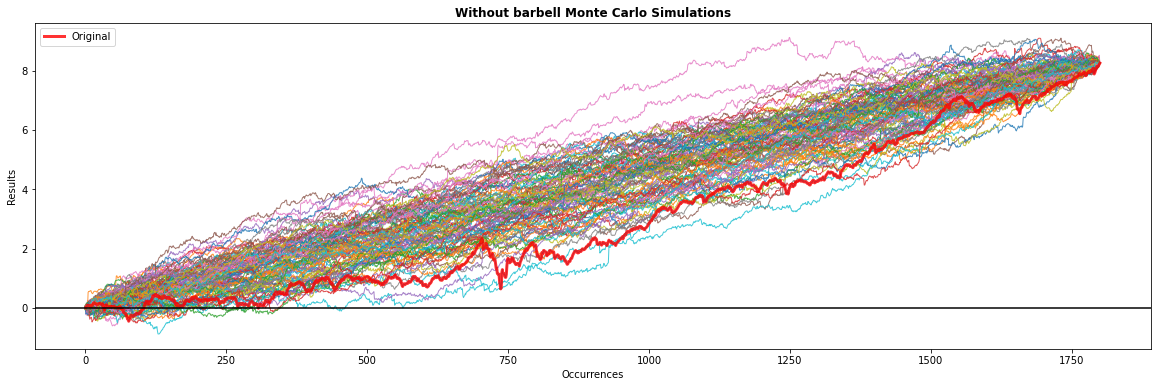

{'min': 8.250132331879191, 'max': 8.250132331879243, 'mean': 8.250132331879223, 'median': 8.250132331879225, 'std': 8.84222148719265e-15, 'maxdd': -0.8811239116844646, 'bust': 0.28, 'goal': 0.72}


In [43]:

mc = df3['pct'].montecarlo(sims=100, bust=-0.2, goal=1)
mc.plot(title="Without barbell Monte Carlo Simulations", figsize=(20, 6))
print(mc.stats)

In [209]:
print(df2[["Unnamed: 1", "portfolio", "pct", "gain_pct"]].tail(20))

       Unnamed: 1    portfolio       pct  gain_pct
1788      2890.17  2890.170000  0.012422  0.002751
1789  2996.113636  2996.113636  0.036657  0.002751
1790  2897.498182  2897.498182 -0.032914  0.002751
1791     2982.156  2982.156000  0.029218  0.002751
1792      2977.68  2977.680000 -0.001501  0.002751
1793    3104.9045  3104.904500  0.042726  0.002751
1794  3176.749524  3176.749524  0.023139  0.002751
1795  3278.202857  3278.202857  0.031936  0.002751
1796  3277.314211  3287.222625 -0.000271  0.002751
1797  2652.393636  3660.099318 -0.190681  0.113432
1798  2761.975238  3670.169850  0.041314  0.002751
1799     2919.615  3680.268090  0.057075  0.002751
1800  3104.660909  3690.394115  0.063380  0.002751
1801  3207.619091  3700.548001  0.033162  0.002751
1802      3391.71  3710.729825  0.057392  0.002751
1803  3365.516667  3720.939664 -0.007723  0.002751
1804  3418.701364  3731.177594  0.015803  0.002751
1805    3548.9925  3741.443693  0.038111  0.002751
1806      3695.31  3751.738039 

# Daily DOW data

In [109]:
df5 = pd.read_csv("/Users/shan/Documents/RWRI Code/USETHIS.csv")
df5 = df5[5400:] # Because mkt was closed for 6mo
# reverse df2
# df2 = df2.iloc[::-1]

df5.head(10)

,Date,Value
5400,1914-12-14,56.76
5401,1914-12-15,55.07
5402,1914-12-16,55.35
5403,1914-12-17,55.36
5404,1914-12-18,55.09
5405,1914-12-19,55.2
5406,1914-12-21,54.46
5407,1914-12-22,54.42
5408,1914-12-23,53.46
5409,1914-12-24,53.17


In [110]:
df5['Datetime'] = pd.to_datetime(df5['Date'])
df5.set_index(['Datetime'], inplace=True)
df5['Value'] = df5['Value'].str.replace(',', '').astype(float)
df5["Value"] = pd.to_numeric(df5["Value"], downcast="float")

In [111]:
df5.head(1000)["Value"]


Datetime
1914-12-14    56.759998
1914-12-15    55.070000
1914-12-16    55.349998
1914-12-17    55.360001
1914-12-18    55.090000
                ...    
1918-04-11    75.580002
1918-04-12    76.250000
1918-04-13    76.010002
1918-04-15    77.510002
1918-04-16    77.209999
Name: Value, Length: 1000, dtype: float32

In [114]:
monthly = df5["Value"].resample('M').ohlc()
print (monthly)

                    open          high           low         close
Datetime                                                          
1914-12-31     56.759998     56.759998     53.169998     54.580002
1915-01-31     54.630001     58.520000     54.630001     57.160000
1915-02-28     55.590000     57.830002     54.220001     55.180000
1915-03-31     55.290001     61.299999     55.290001     60.830002
1915-04-30     61.049999     71.779999     61.049999     71.779999
...                  ...           ...           ...           ...
2021-07-31  34633.531250  35144.308594  33962.039062  34935.468750
2021-08-31  34838.160156  35625.398438  34792.671875  35360.730469
2021-09-30  35312.531250  35443.820312  33843.921875  33843.921875
2021-10-31  34326.460938  35819.558594  34002.921875  35819.558594
2021-11-30  35913.839844  36432.218750  34483.718750  34483.718750

[1284 rows x 4 columns]


In [115]:
weekly = df5["Value"].resample('W').ohlc()
print (weekly)

                    open          high           low         close
Datetime                                                          
1914-12-20     56.759998     56.759998     55.070000     55.200001
1914-12-27     54.459999     54.459999     53.169998     53.340000
1915-01-03     54.549999     54.630001     54.549999     54.630001
1915-01-10     55.439999     56.549999     55.400002     56.540001
1915-01-17     57.369999     57.900002     57.189999     57.189999
...                  ...           ...           ...           ...
2021-11-07  35913.839844  36327.949219  35913.839844  36327.949219
2021-11-14  36432.218750  36432.218750  35921.230469  36100.308594
2021-11-21  36087.449219  36142.218750  35601.980469  35601.980469
2021-11-28  35619.250000  35813.800781  34899.339844  34899.339844
2021-12-05  35135.941406  35135.941406  34483.718750  34483.718750

[5582 rows x 4 columns]


In [132]:
weekly["pct"] = weekly["close"].pct_change()

In [134]:
stdev = weekly["pct"].std()
print(stdev)


0.025032688


In [139]:
# For each month, if the change is greater than the threshold then add the gain, else subtract the loss.
# Plain vanilla, rest is all invested in mkt, so gets market returns

winThreshold = 2 * stdev  # capture the tail
multiplier = 2
# Cost, it is 2 sided, remember. 0.25% per month is the typical cost at 2 stdev
costOfOptions = multiplier * 25/17400


def gain(row):
    if row["pct"] <= 0:
        # Make sure polarity of cost of options always reduces returns
        mainPfReturns = (1 + costOfOptions) * row["pct"]
        optionReturns = 0
        if row["pct"] < -winThreshold:
            optionReturns = -row["pct"] - winThreshold * multiplier / 2
        return mainPfReturns + optionReturns
    elif row["pct"] > 0:
        # Make sure polarity of cost of options always reduces returns
        mainPfReturns = (1 - costOfOptions) * row["pct"]
        optionReturns = 0
        if row["pct"] > winThreshold:
            optionReturns = row["pct"] - winThreshold * multiplier / 2
        return mainPfReturns + optionReturns


weekly["gain_pct"] = weekly.apply(lambda row: gain(row), axis=1)
portfolioVal = weekly.head(1)["open"].values[0]
oldPfVal = portfolioVal # Only for sanity checks
pfList = [portfolioVal]
# shift the gain by 1 week for comparison and iterate over all rows of weekly
for _, row in weekly.shift(-1).iterrows():
    if np.isnan(row["gain_pct"]):
        continue
    portfolioVal += portfolioVal * row["gain_pct"]
    oldPfVal += oldPfVal * row["pct"]
    pfList.append(portfolioVal)
print(
    "Strategy ending val ",
    portfolioVal,
    "Weeks ",
    len(pfList),
    len(weekly),
    "Ending val buy and hold ",
    weekly.tail(1)["close"],
    oldPfVal
)


Strategy ending val  17850956.43085462 Weeks  5582 5582 Ending val buy and hold  Datetime
2021-12-05    34483.71875
Freq: W-SUN, Name: close, dtype: float32 35458.20547420718


<AxesSubplot:xlabel='Datetime'>

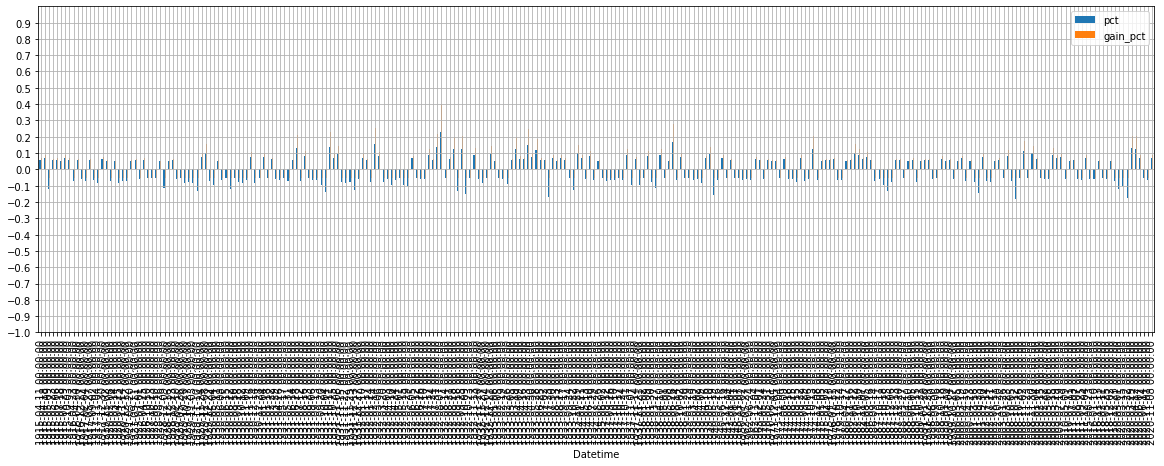

In [140]:
weekly[(weekly["pct"] > winThreshold) | (weekly["pct"] < -winThreshold)][
    ["pct", "gain_pct"]
].plot(
    kind="bar",
    ylim=(-1, 1),
    figsize=(20, 6),
    grid=True,
    yticks=tuple(np.arange(-1, 1, 0.1)),
)


In [141]:
print(
    "2SD wins ",
    len(weekly[(weekly["pct"] > winThreshold)]),
    "2SD losses ",
    len(weekly[(weekly["pct"] < -winThreshold)]),
)


2SD wins  124 2SD losses  146


<AxesSubplot:xlabel='Datetime'>

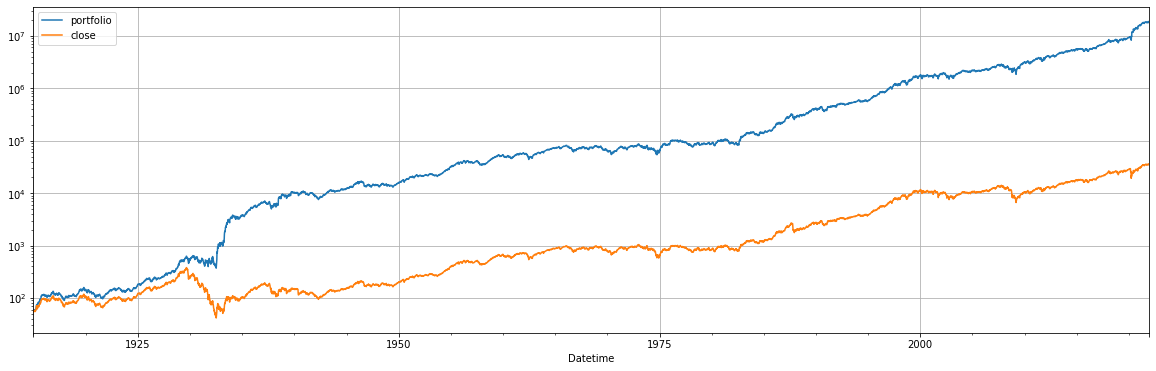

In [142]:
weekly["portfolio"] = pfList
weekly[['portfolio','close']].plot(figsize=(20,6), grid=True, logy=True)

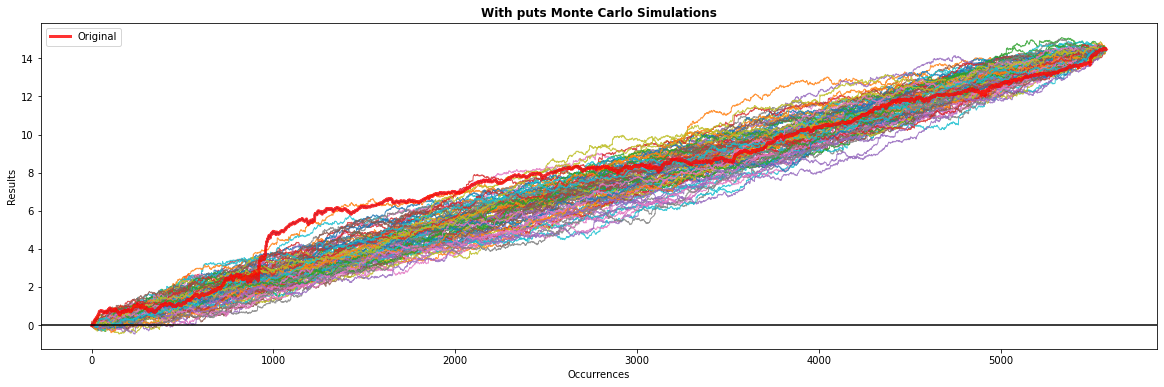

{'min': 14.46868491960663, 'max': 14.468684919606734, 'mean': 14.46868491960669, 'median': 14.468684919606691, 'std': 2.2054850149898073e-14, 'maxdd': -0.47072224481694985, 'bust': 0.13, 'goal': 0.87}


In [143]:

mc = weekly['gain_pct'].montecarlo(sims=100, bust=-0.25, goal=1)
mc.plot(title="With puts Monte Carlo Simulations", figsize=(20, 6))
print(mc.stats)

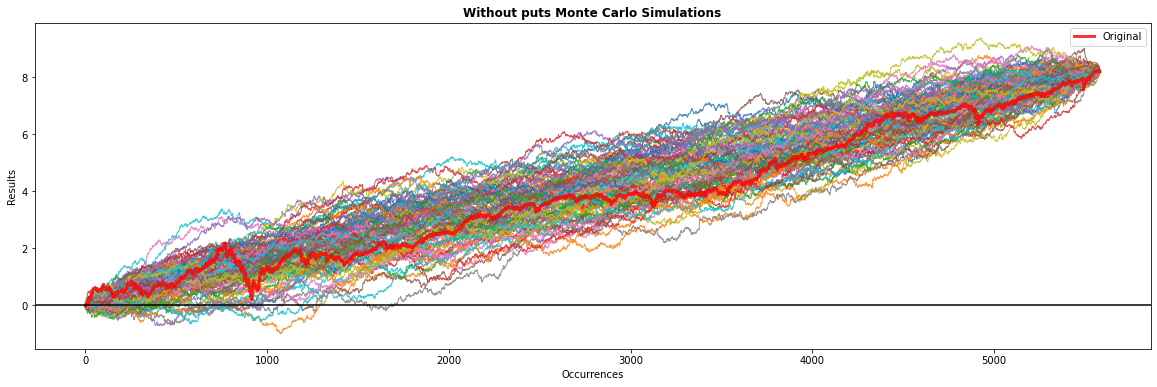

{'min': 8.19879025220871, 'max': 8.19879025220871, 'mean': 8.19879025220871, 'median': 8.19879025220871, 'std': 0.0, 'maxdd': -1.0106547474861145, 'bust': 0.28, 'goal': 0.72}


In [144]:

mc = weekly['pct'].montecarlo(sims=100, bust=-0.2, goal=1)
mc.plot(title="Without puts Monte Carlo Simulations", figsize=(20, 6))
print(mc.stats)

In [146]:
weekly.tail(20)


,open,high,low,close,pct,gain_pct,portfolio
Datetime,,,,,,,
2021-07-25,33962.039062,35061.550781,33962.039062,35061.550781,0.010773,0.010742,1.816023e+07
2021-08-01,35144.308594,35144.308594,34930.929688,34935.468750,-0.003596,-0.003606,1.809473e+07
2021-08-08,34838.160156,35208.511719,34792.671875,35208.511719,0.007816,0.007793,1.823575e+07
2021-08-15,35101.851562,35515.378906,35101.851562,35515.378906,0.008716,0.008691,1.839423e+07
2021-08-22,35625.398438,35625.398438,34894.121094,35120.078125,-0.011130,-0.011162,1.818891e+07
2021-08-29,35335.710938,35455.800781,35213.121094,35455.800781,0.009559,0.009532,1.836228e+07
2021-09-05,35399.839844,35443.820312,35312.531250,35369.089844,-0.002446,-0.002453,1.831724e+07
2021-09-12,35100.000000,35100.000000,34607.718750,34607.718750,-0.021526,-0.021588,1.792181e+07
2021-09-19,34869.628906,34869.628906,34577.570312,34584.878906,-0.000660,-0.000662,1.790994e+07


In [149]:
# How we do in the drawdowns
pd.set_option('display.max_rows', len(weekly))
weekly[(weekly['pct'] < -winThreshold)][["close", "portfolio", "pct", "gain_pct"]]

,close,portfolio,pct,gain_pct
Datetime,,,,
1915-05-09,62.770000,7.155277e+01,-0.122221,-0.050417
1916-04-23,84.959999,1.030308e+02,-0.071272,-0.050270
1916-12-17,99.110001,1.222889e+02,-0.062169,-0.050244
1917-02-04,89.970001,1.132875e+02,-0.069693,-0.050266
1917-09-02,83.400002,1.069979e+02,-0.063553,-0.050248
1917-11-04,72.320000,9.610549e+01,-0.083513,-0.050305
1920-02-08,96.129997,1.318924e+02,-0.074071,-0.050278
1920-04-25,95.760002,1.360383e+02,-0.083198,-0.050304
1920-11-14,76.900002,1.116214e+02,-0.071929,-0.050272


In [150]:
weekly[(weekly['pct'] > winThreshold)][["close", "portfolio", "pct", "gain_pct"]]

,close,portfolio,pct,gain_pct
Datetime,,,,
1915-04-11,65.150002,6.751511e+01,0.059522,0.068807
1915-04-18,69.599998,7.334477e+01,0.068304,0.086346
1915-05-23,65.500000,7.518525e+01,0.057646,0.065060
1915-06-06,68.559998,7.943069e+01,0.060152,0.070065
1915-07-18,71.849998,8.326635e+01,0.050746,0.051280
1915-08-29,81.949997,9.648208e+01,0.067613,0.084967
1915-10-03,91.980003,1.092135e+02,0.059555,0.068874
1916-04-30,89.779999,1.095461e+02,0.056733,0.063237
1917-05-27,97.580002,1.234916e+02,0.056404,0.062580
